#Setting Up Environment

In [1]:
import pandas as pd


file = ('/content/walmart.csv')

df = pd.read_csv(file)


# We have columns and indexes (0,1,2,3..)

In [2]:
df = df.rename(columns= {'User_ID': 'UserID',
                    'Product_ID': 'ProductID',


                    'City_Category': 'City',
       'Stay_In_Current_City_Years': 'YearsOfResidence',
                    'Marital_Status':'MaritalStatus',
                    'Product_Category': 'ProductCategory',
                    'Purchase': 'ReceiptSum'})

# PCA and K Means

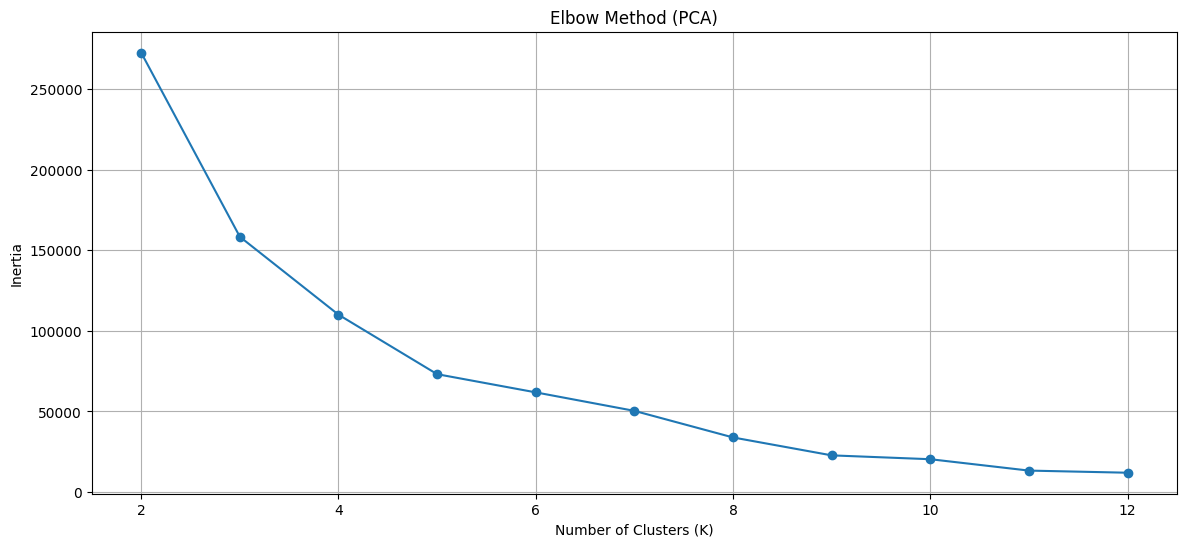

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt


#If NAN error come up, restart session and reload data - may take a few reruns

Vars = df[['ReceiptSum', 'ProductCategory']]

#encode
OneHot = pd.get_dummies(Vars['ProductCategory'], prefix='ProductCategory')


# Scale
scaler = StandardScaler()
scaledRecieptSum = scaler.fit_transform(Vars[['ReceiptSum']])

# Combine scaled numeric with unscaled one-hot
Hotvars = pd.concat([pd.DataFrame(scaledRecieptSum, columns=['ReceiptSum'], index=Vars.index),OneHot], axis=1)

# final data
scaledData = Hotvars.values
dataframeScaled = pd.DataFrame(scaledData, index=df.index, columns=Hotvars.columns)

# Apply PCA
pca = PCA(n_components=2)
pcaData = pca.fit_transform(scaledData)

# Elbow Method
maxK = 12
inertia = []
k_values = range(2, maxK+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit(pcaData)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(14, 6))
plt.plot(k_values, inertia, marker='o')
#plt.axvline(x=3, color='orange', linestyle='--', label='K = 3')
#plt.axvline(x=4, color='cyan', linestyle='--', label='K = 4')
plt.title("Elbow Method (PCA)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

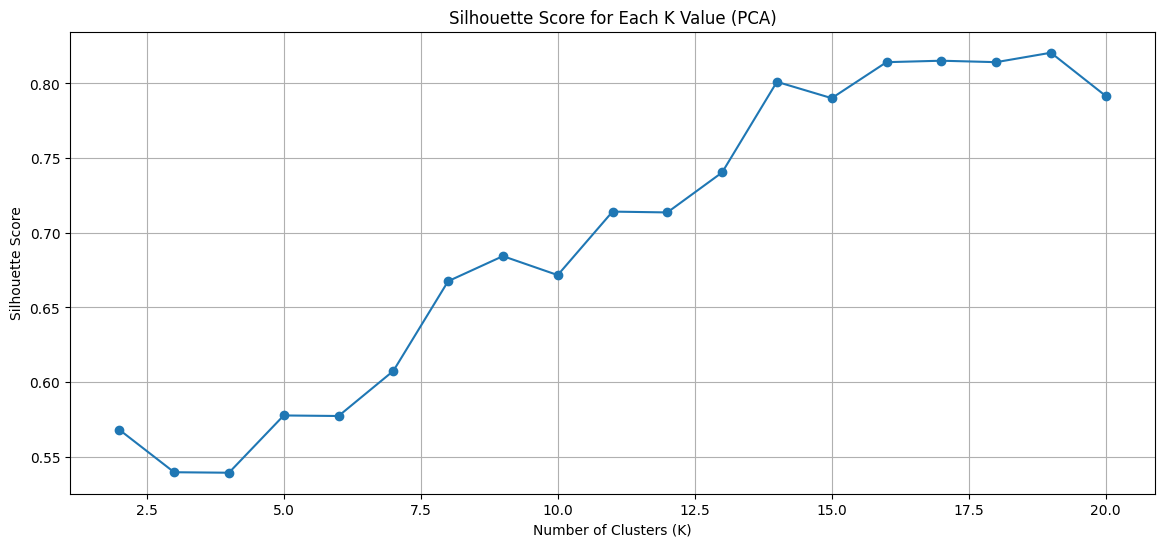

In [4]:
#Lets check the Silhouette Score  the degree to which you have a shadow - lower shadow is worse

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

minidf = df.sample(frac = .01, random_state =42 )  # this downsamples all the data downstream


#sampled to reduce runtim
Vars = minidf[['ReceiptSum', 'ProductCategory']]

#encode
OneHot = pd.get_dummies(Vars['ProductCategory'], prefix='ProductCategory')


# Scale
scaler = StandardScaler()
scaledRecieptSum = scaler.fit_transform(Vars[['ReceiptSum']])

# Combine scaled numeric with unscaled one-hot
Hotvars = pd.concat([pd.DataFrame(scaledRecieptSum, columns=['ReceiptSum'], index=Vars.index),OneHot], axis=1)

# final data
scaledData = Hotvars.values
dataframeScaled = pd.DataFrame(scaledData, index=minidf.index, columns=Hotvars.columns)

# Apply PCA
pca = PCA(n_components=2)
pcaData = pca.fit_transform(scaledData)

# Elbow Method
maxK = 20
inertia = []
silhouettelist = []

k_values = range(2, maxK+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=200)

    clusterlabel= kmeans.fit_predict(pcaData)

    silhouettescore = silhouette_score(pcaData, clusterlabel)
    silhouettelist.append(silhouettescore)

    inertia.append(kmeans.inertia_)


plt.figure(figsize=(14, 6))
plt.plot(k_values, silhouettelist, marker='o')
#plt.axvline(x=3, color='orange', linestyle='--', label='K = 3')
#plt.axvline(x=4, color='cyan', linestyle='--', label='K = 4')
plt.title("Silhouette Score for Each K Value (PCA)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


## KMeans with Elbow Method Result

Reset data to remove scaling

In [ ]:
# Run Kmeans K = 8
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42)
cluster_assignments_k3 = kmeans.fit_predict(pcaData)


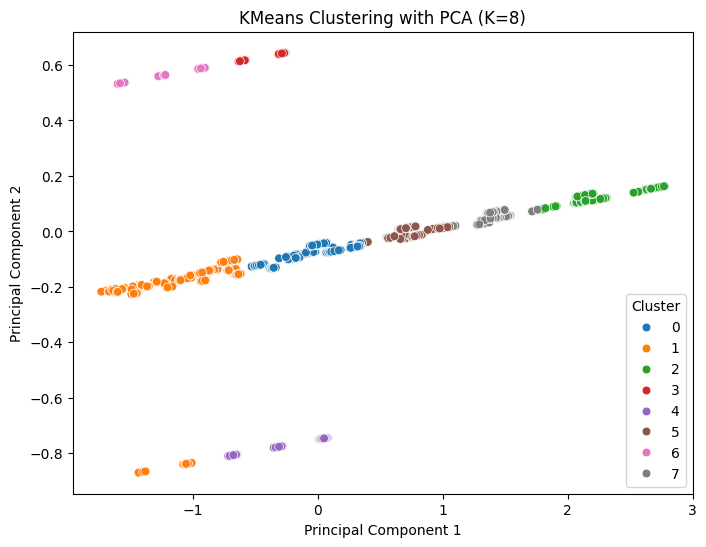

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


pca_df = pd.DataFrame(pcaData, columns=['PCA1', 'PCA2'])  # cant use orig feature names
pca_df['Cluster'] = cluster_assignments_k3  # Add the cluster labels as a new column
k3centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))


sns.scatterplot( x='PCA1',  y='PCA2', hue='Cluster', data=pca_df, palette='tab10', s=40 )

#plt.scatter(  k3centroids[:, 0],k3centroids[:, 1],c='black',marker='*', s=250,edgecolor='white', label='Centroid',
#    zorder=2
#)

plt.title("KMeans Clustering with PCA (K=8)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


#plt.grid(True)# Add grid
plt.legend(title='Cluster')

plt.show()


In [ ]:
# Run Kmeans K =9

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=42)
cluster_assignments_k4 = kmeans.fit_predict(pcaData)

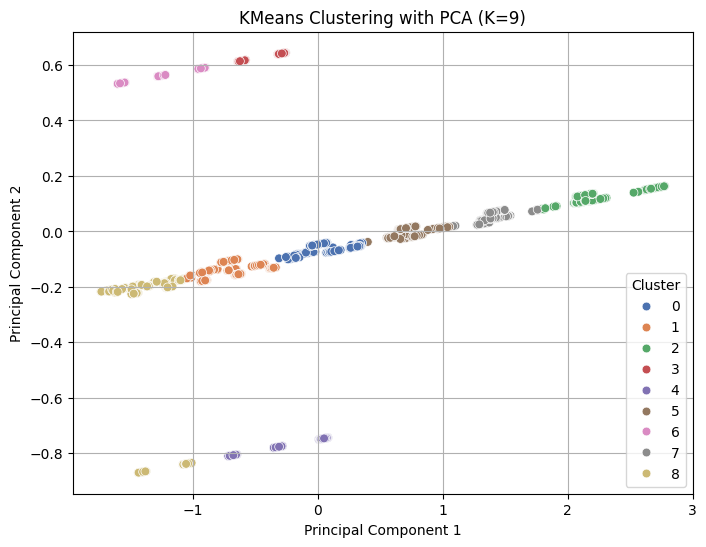

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


pca_df = pd.DataFrame(pcaData, columns=['PCA1', 'PCA2'])  # cant use orig feature names
pca_df['Cluster'] = cluster_assignments_k4  # Add the cluster labels as a new column
k4centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))


sns.scatterplot( x='PCA1',  y='PCA2', hue='Cluster', data=pca_df, palette='deep', s=40 )

#plt.scatter(  k4centroids[:, 0],k4centroids[:, 1],c='black',marker='*', s=250,edgecolor='white', label='Centroid',zorder=2)


plt.title("KMeans Clustering with PCA (K=9)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


plt.grid(True)# Add grid
plt.legend(title='Cluster')

plt.show()


## Kmeans with Silhouette Score

In [ ]:
# Run Kmeans K = 14 with Silhouette Score

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=14, random_state=42)
cluster_assignments_k3 = kmeans.fit_predict(pcaData)


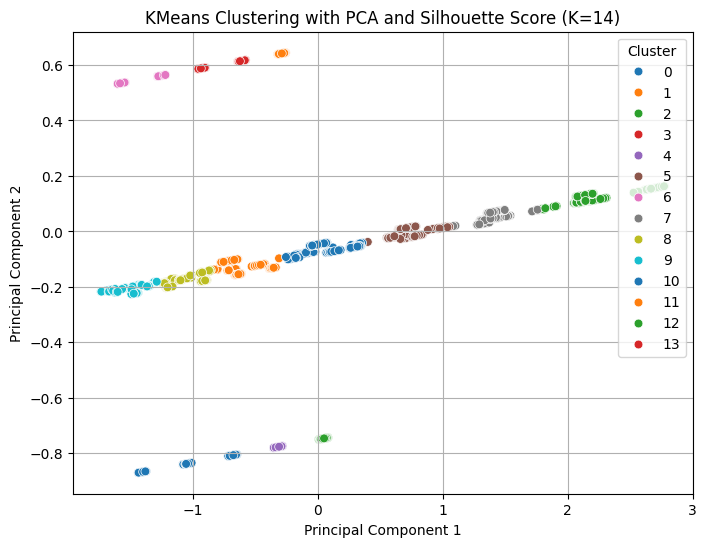

In [ ]:
# Kmeans with Silhouette Score K=14

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

k3silhouette = silhouettelist[k_values.index(3)]

pca_df = pd.DataFrame(pcaData, columns=['PCA1', 'PCA2'])  # cant use orig feature names
pca_df['Cluster'] = cluster_assignments_k3  # Add the cluster labels as a new column
k3centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))

sns.scatterplot( x='PCA1',  y='PCA2', hue='Cluster', data=pca_df, palette='tab10', s=40 )

#plt.scatter(  k3centroids[:, 0],k3centroids[:, 1],c='black',marker='*', s=250,edgecolor='white', label='Centroid',zorder=2)


plt.title("KMeans Clustering with PCA and Silhouette Score (K=14)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


plt.grid(True)# Add grid
plt.legend(title='Cluster')

plt.show()

# DB Scan

In [ ]:
"""
# code block is here if data reset or downsampling is needed to reduce runtime

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt


# Downsample if needed
minidf = df.sample(frac = .03, random_state =42 )


#sampled to reduce runtim
Vars = minidf[['ReceiptSum', 'ProductCategory']]

#encode
OneHot = pd.get_dummies(Vars['ProductCategory'], prefix='ProductCategory')


# Scale
scaler = StandardScaler()
scaledRecieptSum = scaler.fit_transform(Vars[['ReceiptSum']])

# Combine scaled numeric with unscaled one-hot
Hotvars = pd.concat([pd.DataFrame(scaledRecieptSum, columns=['ReceiptSum'], index=Vars.index),OneHot], axis=1)

# final data
scaledData = Hotvars.values
dataframeScaled = pd.DataFrame(scaledData, index=minidf.index, columns=Hotvars.columns)

# Apply PCA
pca = PCA(n_components=2)
pcaData = pca.fit_transform(scaledData)



# check shape
print("PCA-transformed data shape:", pcaData.shape)
"""



## Fine Tuning for eps and min_pts

In [5]:
import numpy as np
# Returns the percentage of transactions that were assigned to a cluster (not labeled as noise)
# `cluster_labels` is the output of DBSCAN (list of cluster assignments)
def percentClustered(assignedClusters):
    Alltransactions = len(assignedClusters)
    clusteredTransactions = Alltransactions - list(assignedClusters).count(-1)
    return (clusteredTransactions / Alltransactions) * 100



# Return the number of unique clusters (excluding noise)
# `cluster_labels` is the output of DBSCAN
def clusterCount(uniqueClusters):
    clusterids = set(uniqueClusters)
    if -1 in clusterids:
        clusterids.remove(-1)  # Remove noise
    totaldistinctclusters = len(clusterids)
    return totaldistinctclusters

In [6]:

##########################use this block most efficient order

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid to search

eps_values = [0.015, 0.02, 0.025, 0.03]         # y-axis (rows)
min_samples_values = [3, 4, 5, 6]               # x-axis (cols)

# Initialize result matrices for heatmaps
percent_clustered = np.zeros((len(eps_values), len(min_samples_values))) # percent of transactions clustered (reciept sum & target categor)
num_clusters = np.zeros((len(eps_values), len(min_samples_values))) # Number of transactions Clusters
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Loop through each eps and min_samples combination

for i, eps in enumerate(eps_values):
    for j, min_pts in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_pts)
        assignedClusters = db.fit_predict(pcaData)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

        if numberOfClusters > 1:  # Also calculate Silh score for each implementation of DB Scan
            silScore = silhouette_score(pcaData[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore



# Final print (just for last config)
print("Percentage of transactions clustered: {:.2f}%".format(percentageClustered))
print("Number of transaction clusters found: {}".format(numberOfClusters))



Percentage of transactions clustered: 99.76%
Number of transaction clusters found: 33


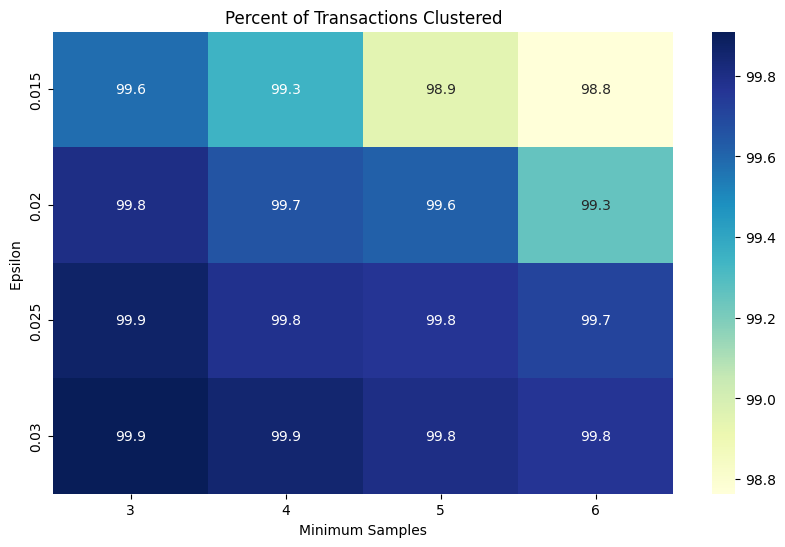

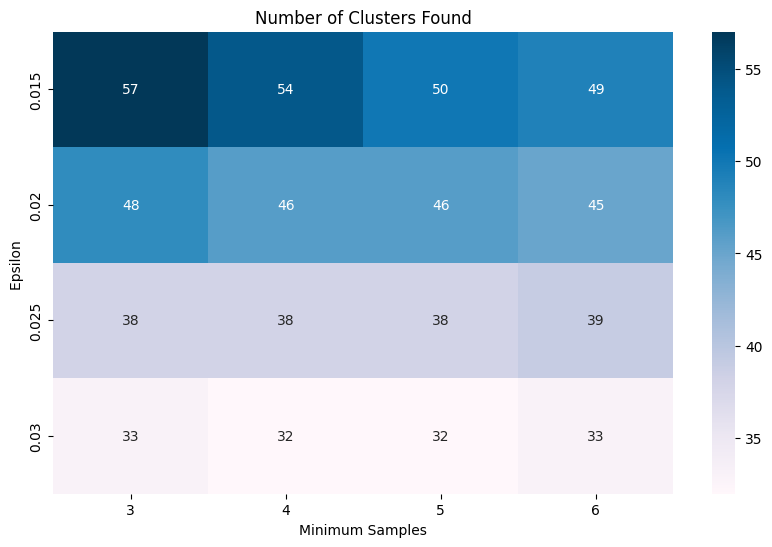

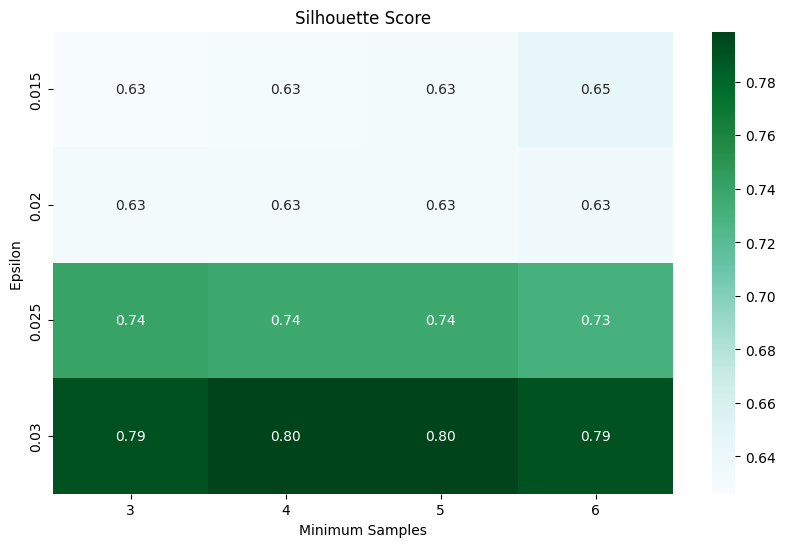

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmaps
plt.figure(figsize=(10, 6))
sns.heatmap(percent_clustered, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon ")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(num_clusters, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon ")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon ")
plt.show()



In [ ]:

##########################use this block most efficient order

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid to search

eps_values = [0.008, 0.009, 0.010, 0.011, 0.012,0.013, 0.014, 0.015, 0.02, 0.025, 0.03]         # y-axis (rows)
min_samples_values = [7, 8, 9, 10, 11, 12, 13, 14, 15]               # x-axis (cols)

# Initialize result matrices for heatmaps
percent_clustered = np.zeros((len(eps_values), len(min_samples_values))) # percent of transactions clustered (reciept sum & target categor)
num_clusters = np.zeros((len(eps_values), len(min_samples_values))) # Number of transactions Clusters
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Loop through each eps and min_samples combination

for i, eps in enumerate(eps_values):
    for j, min_pts in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_pts)
        assignedClusters = db.fit_predict(pcaData)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

        if numberOfClusters > 1:  # Also calculate Silh score for each implementation of DB Scan
            silScore = silhouette_score(pcaData[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore



# Final print (just for last config)
print("Percentage of transactions clustered: {:.2f}%".format(percentageClustered))
print("Number of transaction clusters found: {}".format(numberOfClusters))



Percentage of transactions clustered: 97.96%
Number of transaction clusters found: 26


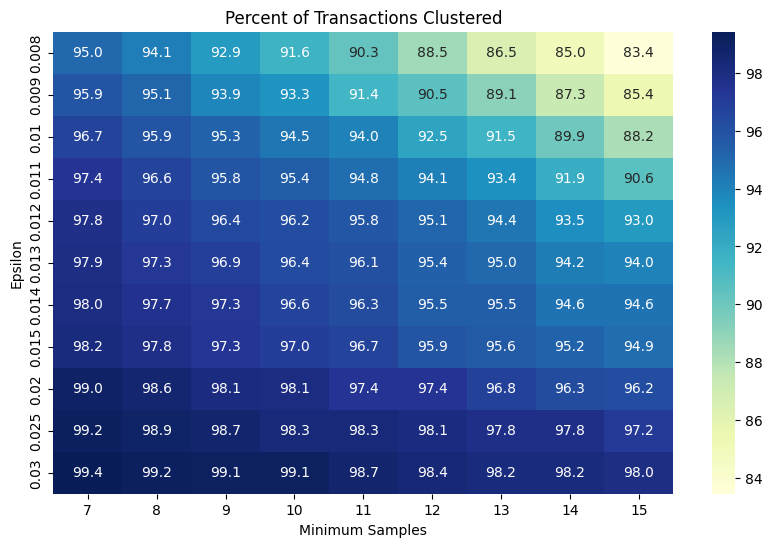

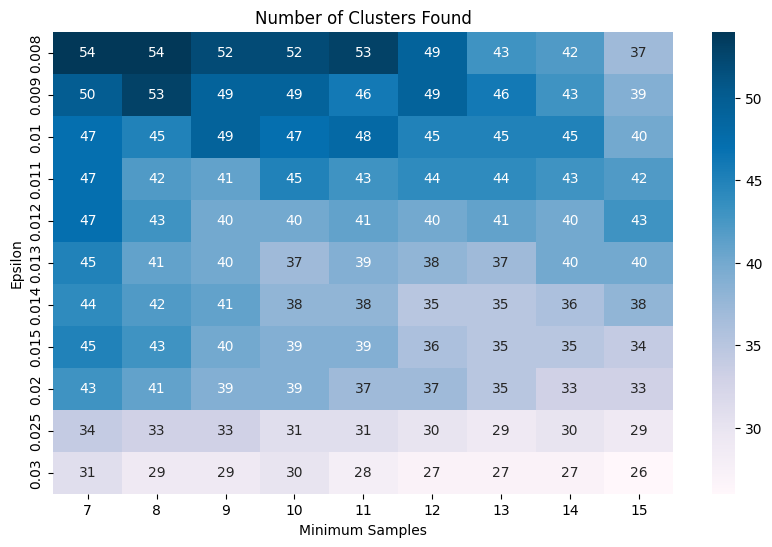

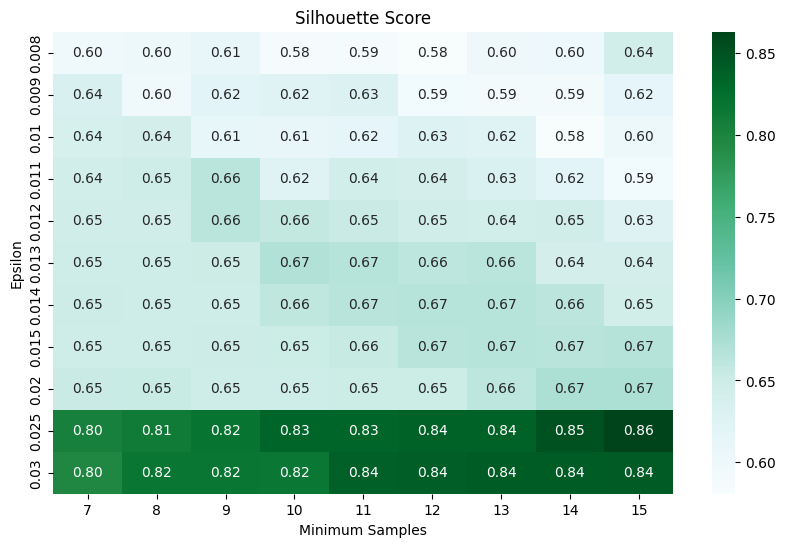

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define axis labels
eps_values = [0.008, 0.009, 0.010, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03]
min_samples_values = [7, 8, 9, 10, 11, 12, 13, 14, 15]
# Percent clustered
plt.figure(figsize=(10, 6))
sns.heatmap(percent_clustered, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()

# Number of clusters
plt.figure(figsize=(10, 6))
sns.heatmap(num_clusters, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()

# Silhouette scores
plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()


## Keep searching for lower number of clusters

In [ ]:

##########################use this block most efficient order

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid to search

eps_values = [ 0.010, 0.015, 0.02, 0.025, 0.03, .035, .04, .045, .05, .055, .6]         # y-axis (rows)
min_samples_values = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25]               # x-axis (cols)

# Initialize result matrices for heatmaps
percent_clustered = np.zeros((len(eps_values), len(min_samples_values))) # percent of transactions clustered (reciept sum & target categor)
num_clusters = np.zeros((len(eps_values), len(min_samples_values))) # Number of transactions Clusters
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Loop through each eps and min_samples combination

for i, eps in enumerate(eps_values):
    for j, min_pts in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_pts)
        assignedClusters = db.fit_predict(pcaData)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

        if numberOfClusters > 1:  # Also calculate Silh score for each implementation of DB Scan
            silScore = silhouette_score(pcaData[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore



# Final print (just for last config)
print("Percentage of transactions clustered: {:.2f}%".format(percentageClustered))
print("Number of transaction clusters found: {}".format(numberOfClusters))



Percentage of transactions clustered: 100.00%
Number of transaction clusters found: 3


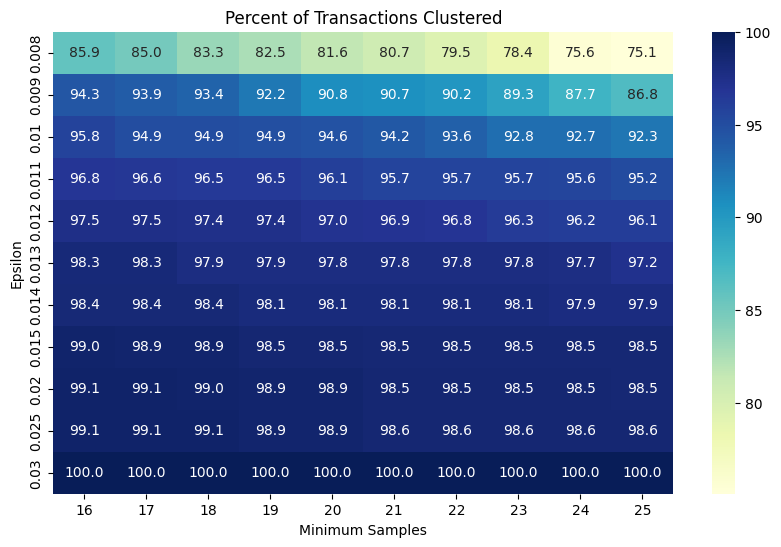

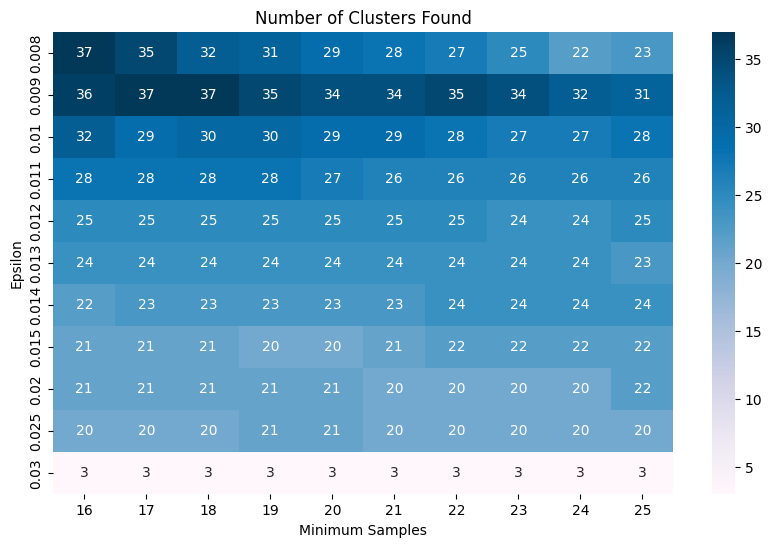

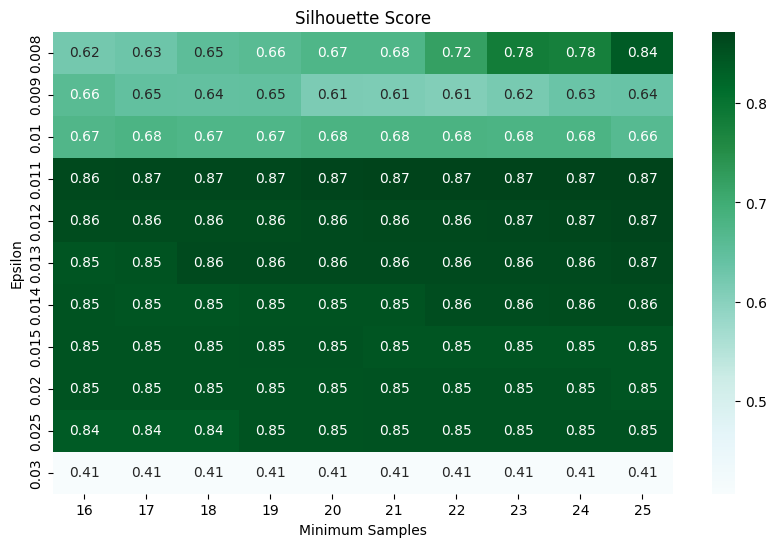

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define axis labels
eps_values = [0.008, 0.009, 0.010, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03]
min_samples_values = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
# Percent clustered
plt.figure(figsize=(10, 6))
sns.heatmap(percent_clustered, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()

# Number of clusters
plt.figure(figsize=(10, 6))
sns.heatmap(num_clusters, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()

# Silhouette scores
plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()


In [ ]:

########################## may take a few minutes to run

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid to search

eps_values = [.0075, 0.010, 0.015, 0.02, 0.03, .04, .045, .05, .06, .07, .08]
min_samples_values = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]                 # x-axis (cols)

# Initialize result matrices for heatmaps
percent_clustered = np.zeros((len(eps_values), len(min_samples_values))) # percent of transactions clustered (reciept sum & target categor)
num_clusters = np.zeros((len(eps_values), len(min_samples_values))) # Number of transactions Clusters
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Loop through each eps and min_samples combination

for i, eps in enumerate(eps_values):
    for j, min_pts in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_pts)
        assignedClusters = db.fit_predict(pcaData)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

        if numberOfClusters > 1:  # Also calculate Silh score for each implementation of DB Scan
            silScore = silhouette_score(pcaData[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore


# Final print (just for last config)
print("Percentage of transactions clustered: {:.2f}%".format(percentageClustered))
print("Number of transaction clusters found: {}".format(numberOfClusters))



Percentage of transactions clustered: 99.25%
Number of transaction clusters found: 16


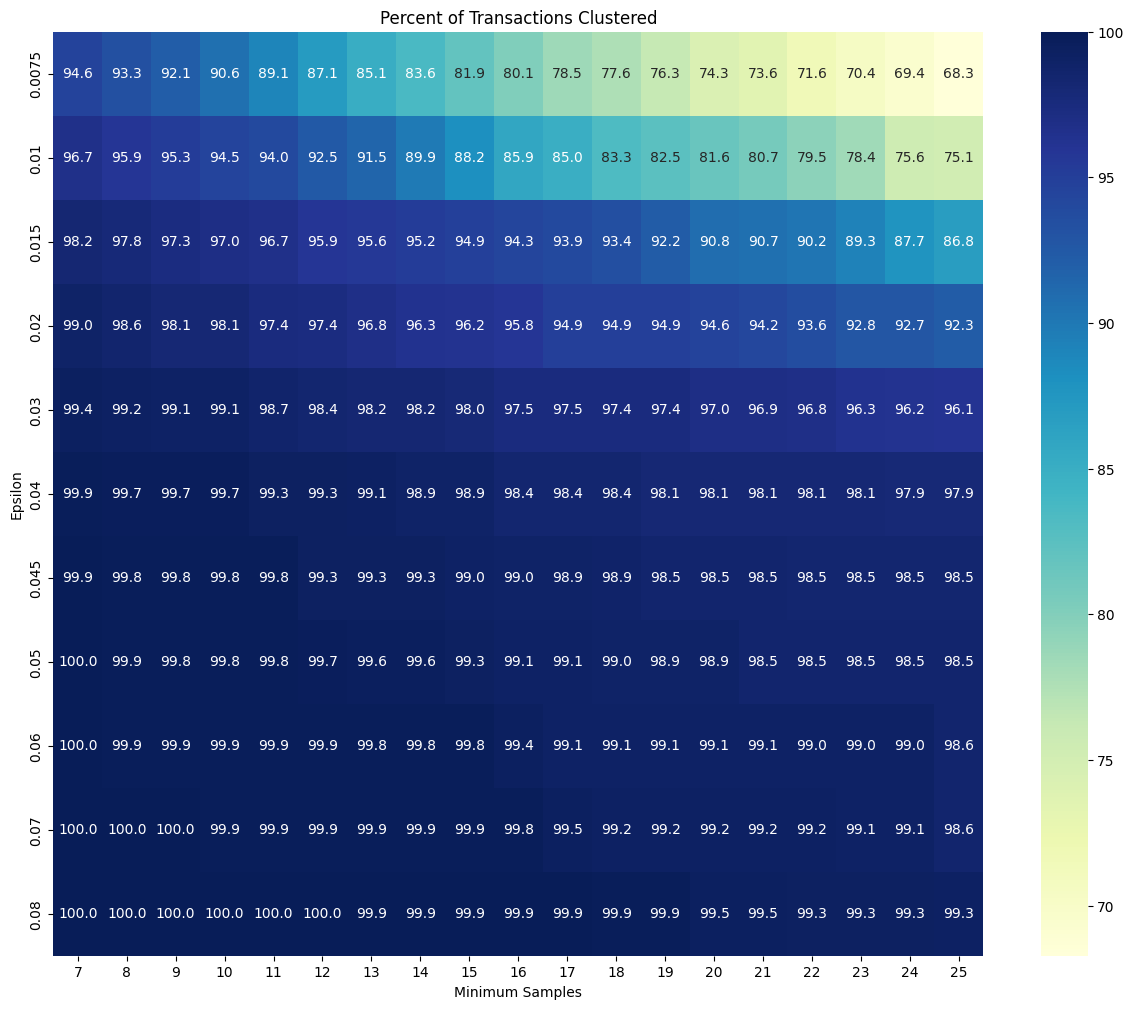

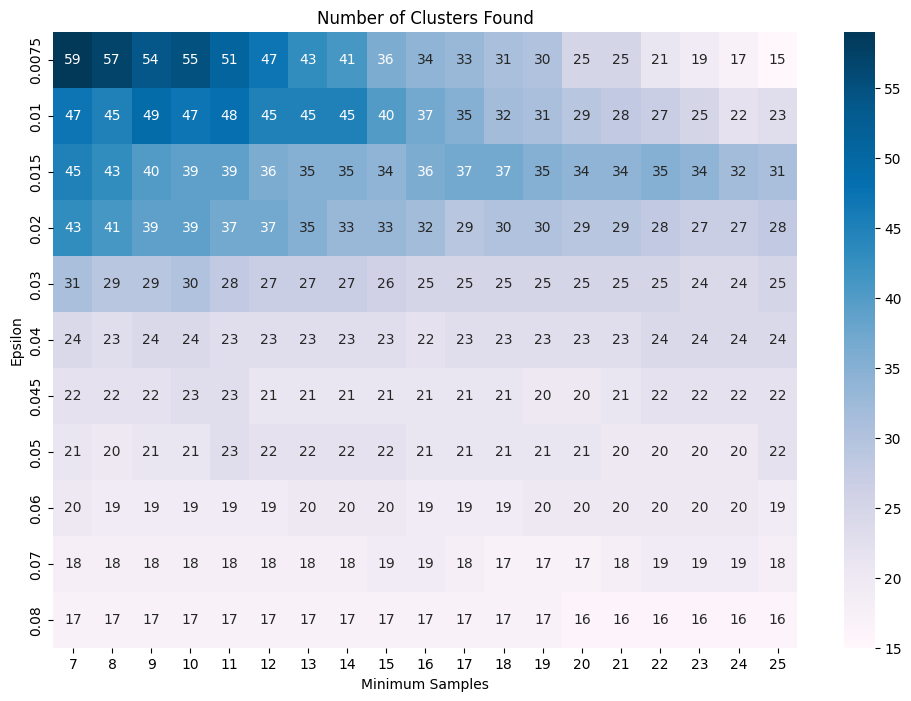

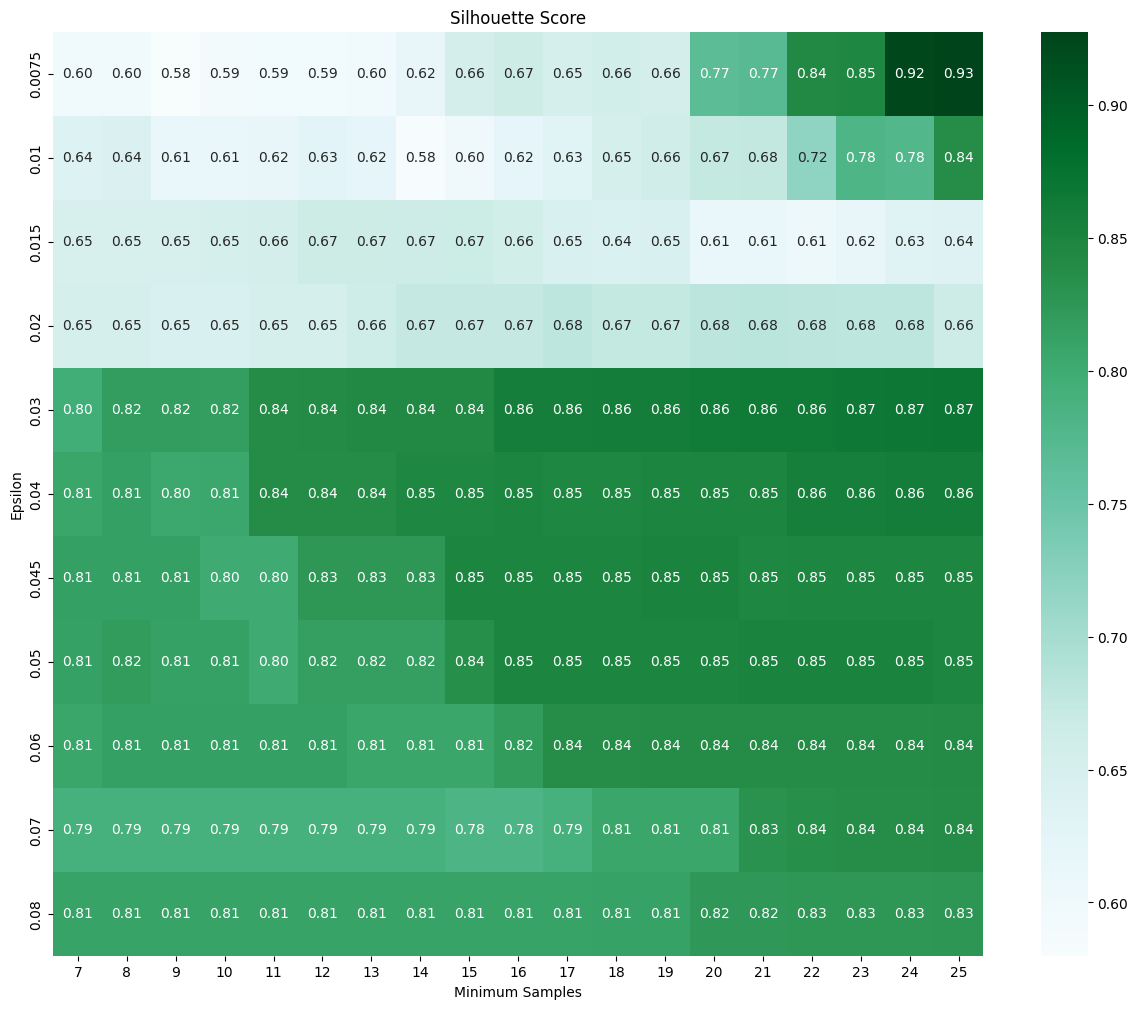

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define axis labels
eps_values = [.0075, 0.010, 0.015, 0.02, 0.03, .04, .045, .05, .06, .07, .08]
min_samples_values = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]               # x-axis (cols)
# Percent clustered
plt.figure(figsize=(15, 12))
sns.heatmap(percent_clustered, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()

# Number of clusters
plt.figure(figsize=(12, 8))
sns.heatmap(num_clusters, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()

# Silhouette scores
plt.figure(figsize=(15, 12))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Set the params
eps = 0.06
min_samples = 20

#  DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
assignedClusters = db.fit_predict(pcaData)


In [ ]:
# Display the results


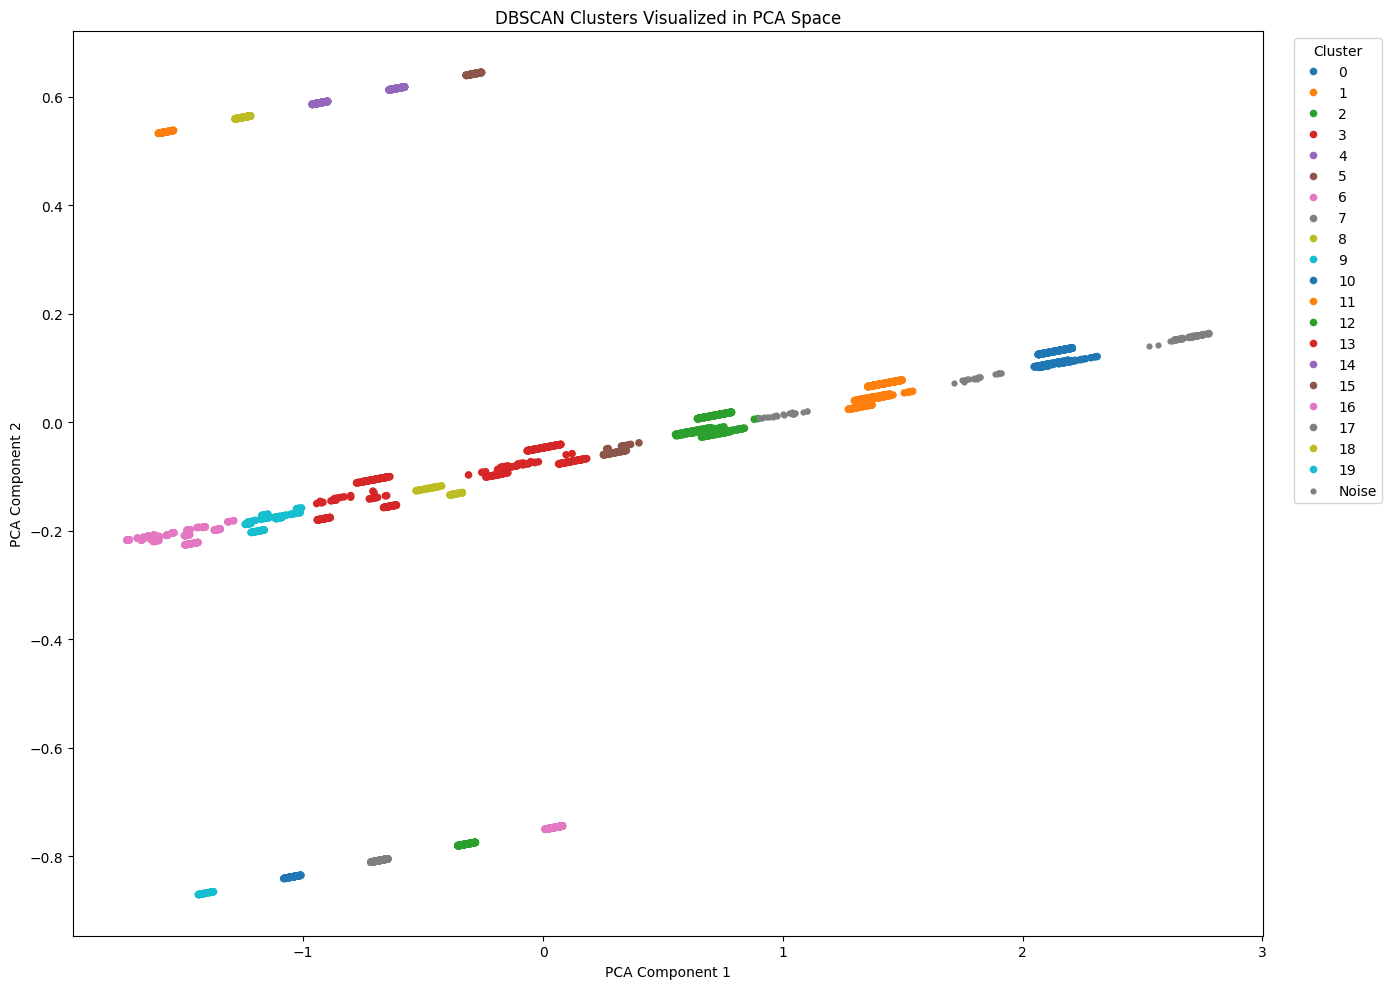

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# X, Y are PCA components
X = pcaData[:, 0]
Y = pcaData[:, 1]
cluster_ids = assignedClusters

# Prepare color mapping: core clusters + noise
core_mask = cluster_ids != -1
noise_mask = cluster_ids == -1

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X[core_mask], y=Y[core_mask], hue=cluster_ids[core_mask], palette="tab10", s=30, linewidth=0)
sns.scatterplot(x=X[noise_mask], y=Y[noise_mask], color="gray", s=20, label="Noise", linewidth=0)

plt.title("DBSCAN Clusters Visualized in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Final DB Scan

In [ ]:
from sklearn.cluster import DBSCAN

# Set the params
eps = 0.03
min_samples = 23

#  DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
assignedClusters = db.fit_predict(pcaData)


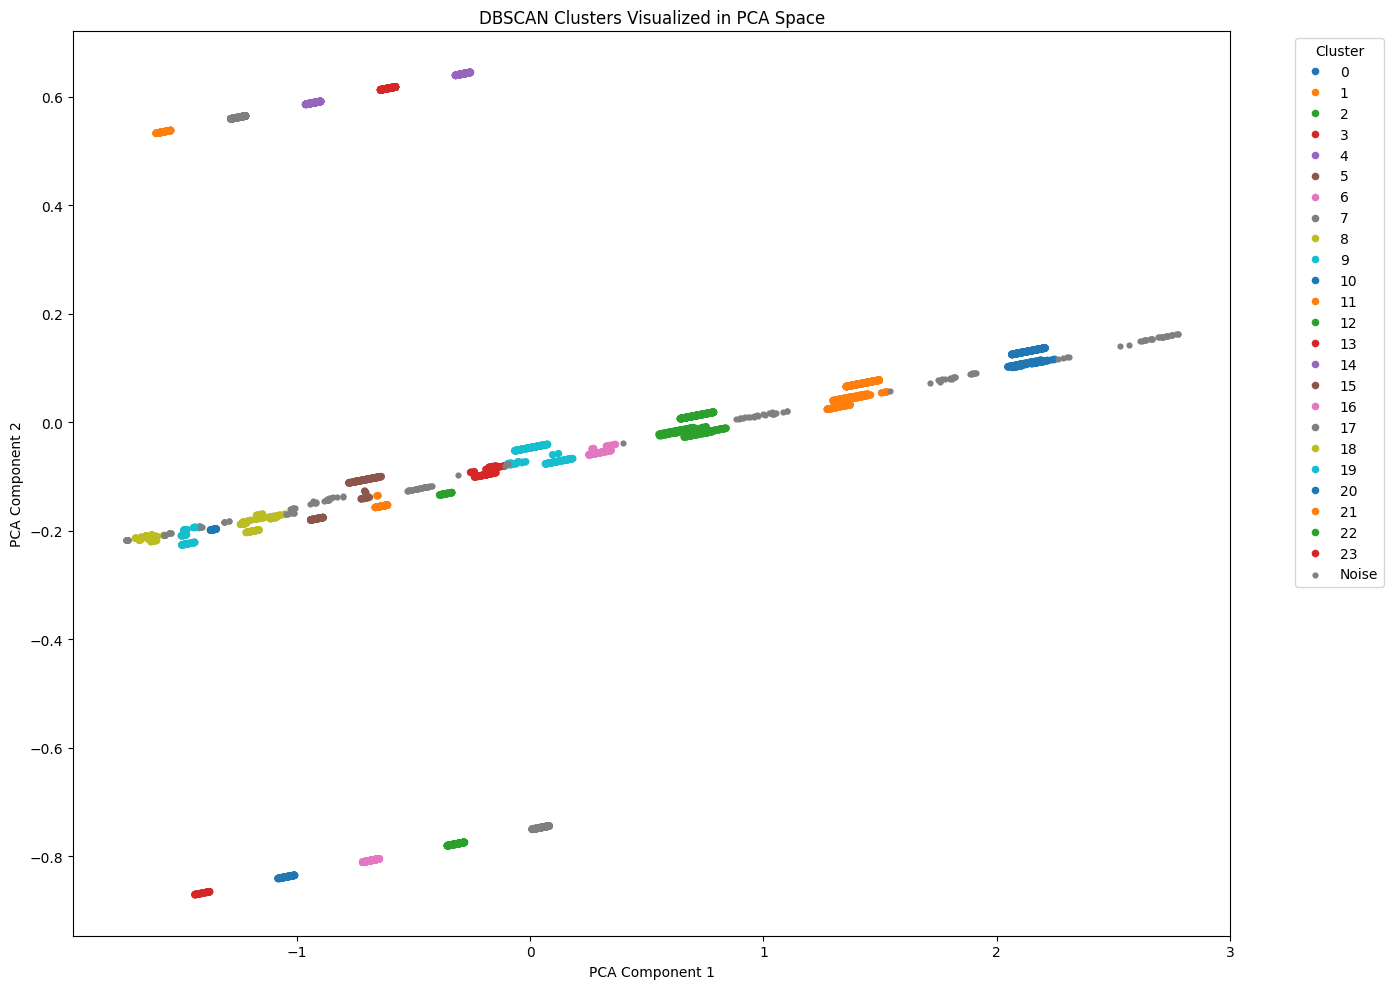

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# X, Y are PCA components
X = pcaData[:, 0]
Y = pcaData[:, 1]
cluster_ids = assignedClusters

# Prepare color mapping: core clusters + noise
core_mask = cluster_ids != -1
noise_mask = cluster_ids == -1

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X[core_mask], y=Y[core_mask], hue=cluster_ids[core_mask], palette="tab10", s=30, linewidth=0)
sns.scatterplot(x=X[noise_mask], y=Y[noise_mask], color="gray", s=20, label="Noise", linewidth=0)

plt.title("DBSCAN Clusters Visualized in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#HDBScan


In [ ]:
import numpy as np
# Returns the percentage of transactions that were assigned to a cluster (not labeled as noise)
# `cluster_labels` is the output of DBSCAN (list of cluster assignments)
def percentClustered(assignedClusters):
    Alltransactions = len(assignedClusters)
    clusteredTransactions = Alltransactions - list(assignedClusters).count(-1)
    return (clusteredTransactions / Alltransactions) * 100



# Returns the number of unique clusters (excluding noise)
def clusterCount(uniqueClusters):
    clusterids = set(uniqueClusters)
    if -1 in clusterids:
        clusterids.remove(-1)  # Remove noise
    totaldistinctclusters = len(clusterids)
    return totaldistinctclusters

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# This code block will take 2 minutes to run


minpointpercluster = [10, 15, 20, 25, 30, 40, 50, 75, 100, 125, 150, 175, 200, 225, 250]
noisethresholdabove = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 170, 200, 220]

percent_clustered = np.zeros((len(minpointpercluster), len(noisethresholdabove)))
num_clusters = np.zeros((len(minpointpercluster), len(noisethresholdabove)))
silhouette_scores = np.zeros((len(minpointpercluster), len(noisethresholdabove)))

# Loop through each eps and min_samples combination

for i, min_cluster_size in enumerate(minpointpercluster):
    for j, min_pts in enumerate(noisethresholdabove):
        db = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_pts)
        assignedClusters = db.fit_predict(pcaData)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

  # Also calculate Silh score for each implementation of DB Scan
        if numberOfClusters > 1:
            silScore = silhouette_score(pcaData[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore


print("Percent  clustered: {:.2f}%".format(percentageClustered))
print("Number of clusters found: {}".format(numberOfClusters))

Percent  clustered: 88.40%
Number of clusters found: 11


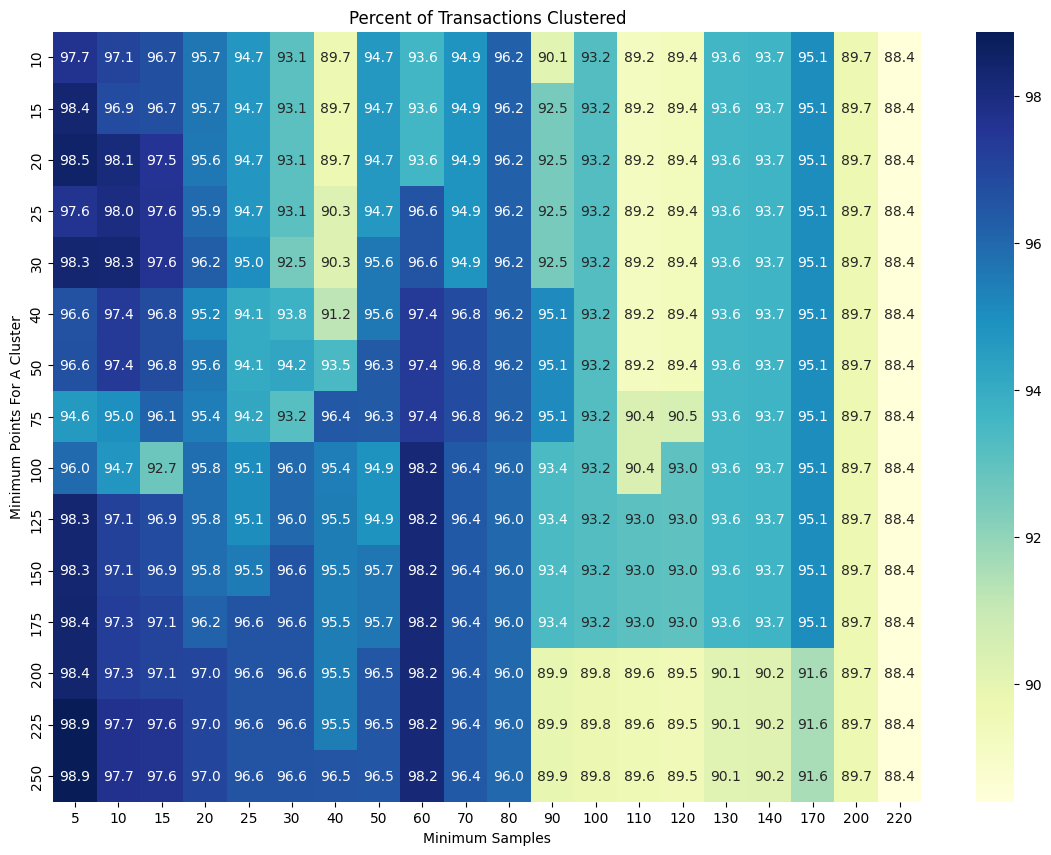

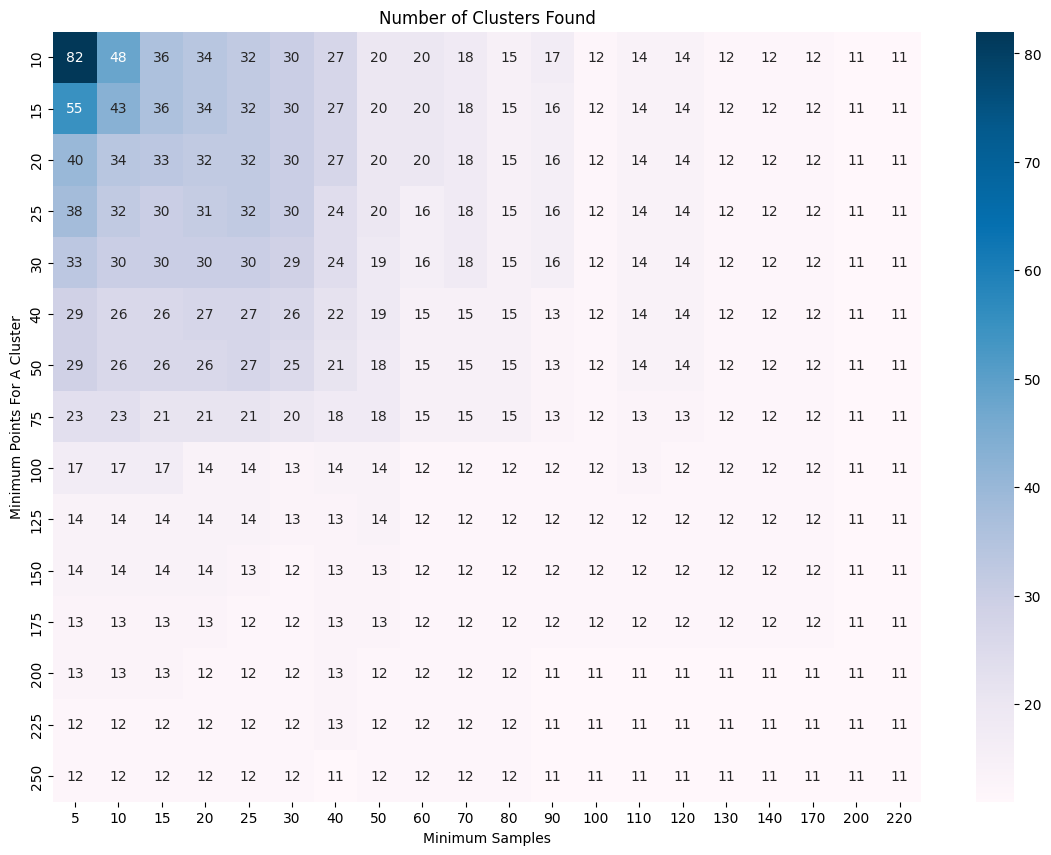

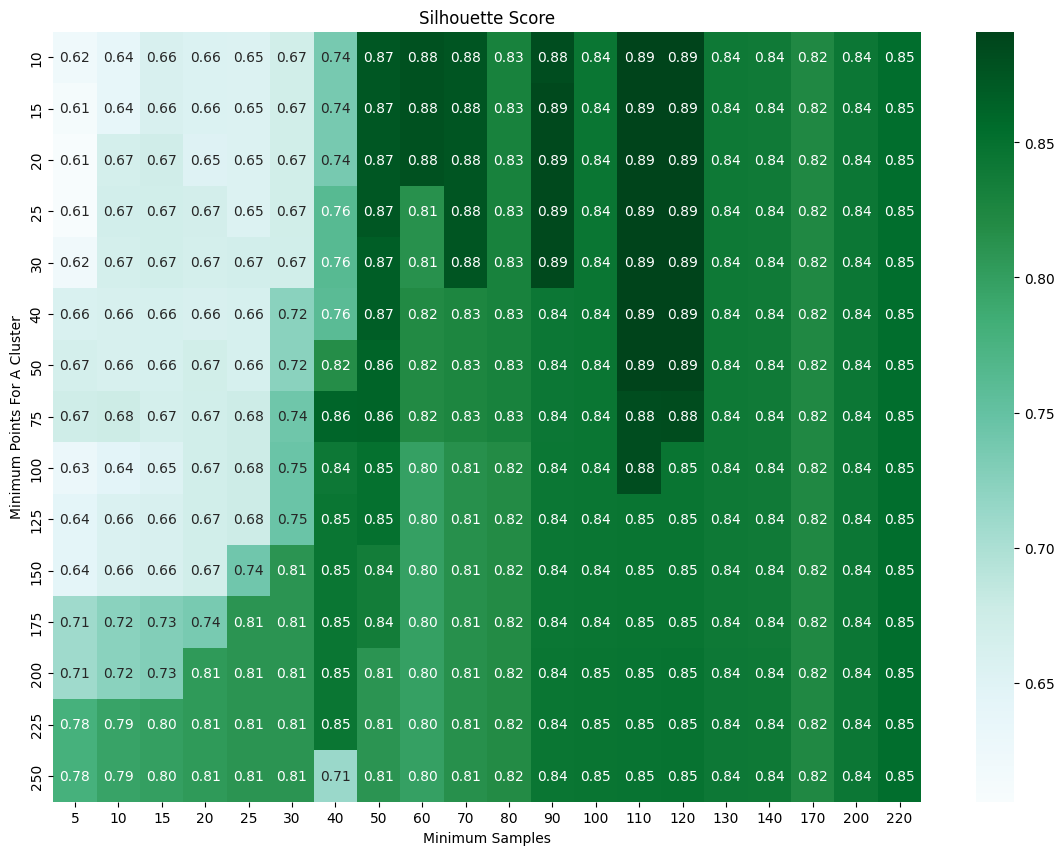

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


minpointpercluster = [10, 15, 20, 25, 30, 40, 50, 75, 100, 125, 150, 175, 200, 225, 250]
noisethresholdabove = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 170, 200, 220]

# Percent heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(percent_clustered, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("Minimum Samples")
plt.ylabel("Minimum Points For A Cluster")
plt.show()

# Number clusters heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(num_clusters, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("Minimum Samples")
plt.ylabel("Minimum Points For A Cluster")
plt.show()

# Silhouette scores
plt.figure(figsize=(14, 10))
sns.heatmap(silhouette_scores, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score")
plt.xlabel("Minimum Samples")
plt.ylabel("Minimum Points For A Cluster")
plt.show()

In [ ]:
from sklearn.cluster import HDBSCAN

# Set the params
min_cluster_size = 40
min_samples = 120

#  HDBSCAN
hdb = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
assignedClusters = db.fit_predict(pcaData)


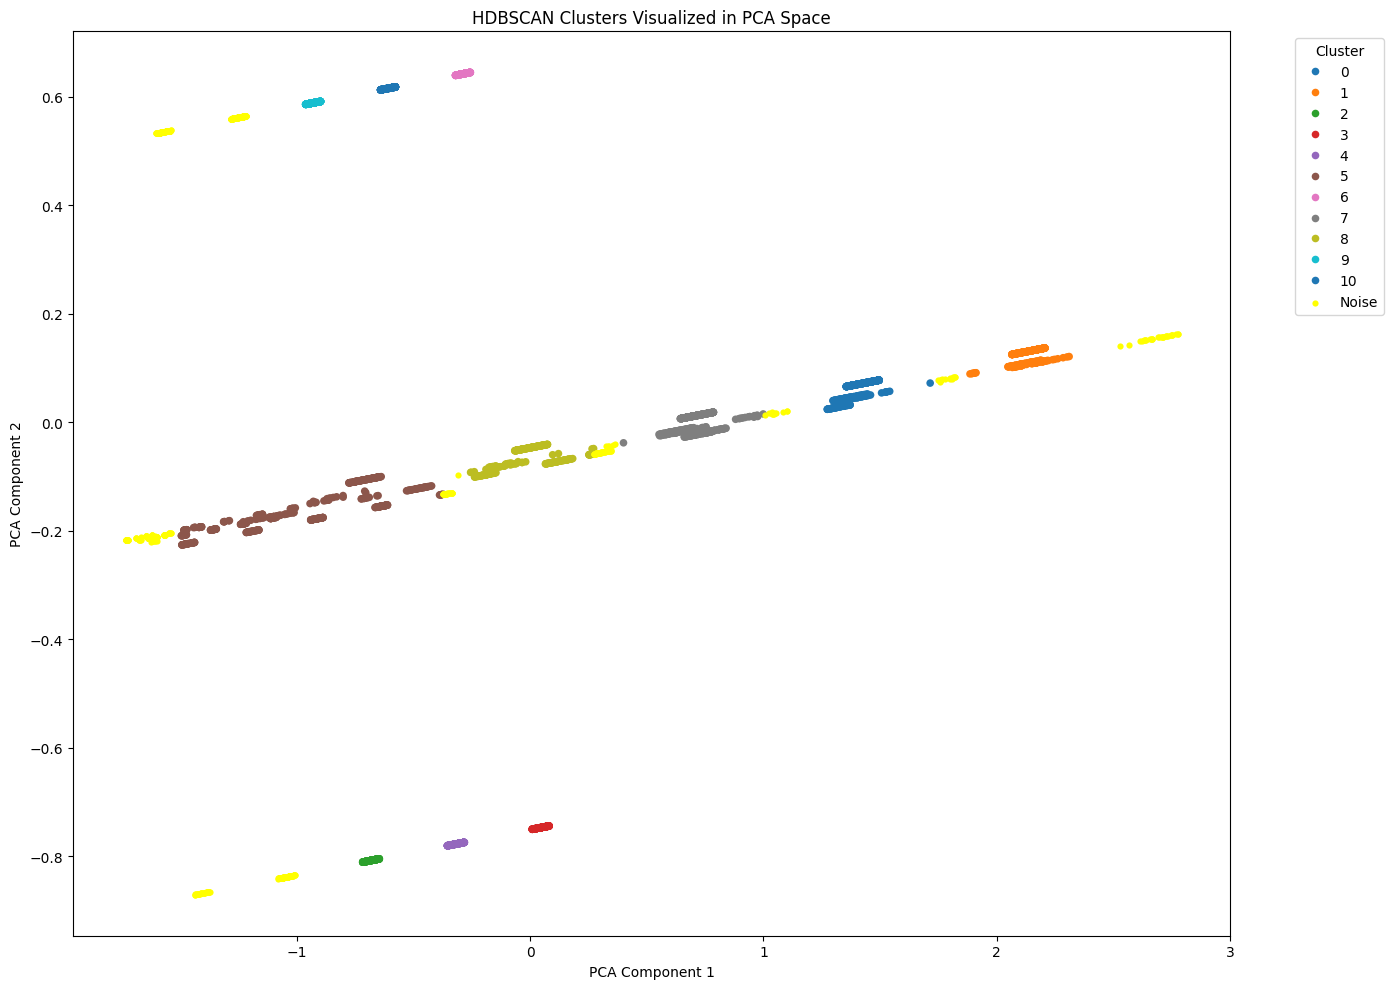

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# X, Y are PCA components
X = pcaData[:, 0]
Y = pcaData[:, 1]
cluster_ids = assignedClusters

# Prepare color mapping: core clusters + noise
core_mask = cluster_ids != -1
noise_mask = cluster_ids == -1

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X[core_mask], y=Y[core_mask], hue=cluster_ids[core_mask], palette="tab10", s=30, linewidth=0)
sns.scatterplot(x=X[noise_mask], y=Y[noise_mask], color="yellow", s=20, label="Noise", linewidth=0)

plt.title("HDBSCAN Clusters Visualized in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# try hierarchical clustering
# give umap a try